In [2]:
# Importing pandas, numpy, sklearn cross validate
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate

In [3]:
# Reading the Dataset using pandas
df = pd.read_csv('C:/Users/rikky/Downloads/bank-additional/bank-additional/bank-additional-full.csv', sep=';')

In [4]:
# Displaying dataframe
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [5]:
# List of Column names and number of NaNs if any 
[print(x, df[x].isna().sum()) for x in df.columns[df.isna().any()].tolist()]

[]

In [6]:
# Check any null values
df.isnull().values.any()

False

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
# Copying dataframe 
new_df = df.copy()

In [9]:
# Converting categorical values to numerical values using integer mapping
map_to_num= {'yes':0, 'no':1, 'unknown':2}
for column in new_df[['default', 'housing', 'loan']]:
    new_df[column]=new_df[column].map(map_to_num)
    
map_day_to_num= {'mon':0, 'tue':1, 'wed':2 ,'thu':3, 'fri':4}
new_df['day_of_week']=new_df['day_of_week'].map(map_day_to_num)

map_month_to_num= {'jan':0, 'feb':1, 'mar':2 ,'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}
new_df['month']=new_df['month'].map(map_month_to_num)

map_contact_to_num= {'cellular':0, 'telephone':1}
new_df['contact']=new_df['contact'].map(map_contact_to_num)

map_y_to_num= {'no':0, 'yes':1}
new_df['y']=new_df['y'].map(map_y_to_num)

In [10]:
new_df.dtypes

age                 int64
job                object
marital            object
education          object
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [11]:
# Convert categorical values to Numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

objectDataTypeColumns = list(new_df.select_dtypes(include=['object']).columns)

encoder = LabelEncoder()
for i in objectDataTypeColumns:
    new_df[i] = encoder.fit_transform(new_df[i].astype('str'))

In [12]:
new_df

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        1        1     1        1      4   
1       57    7        1          3        2        1     1        1      4   
2       37    7        1          3        1        0     1        1      4   
3       40    0        1          1        1        1     1        1      4   
4       56    7        1          3        1        1     0        1      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        1        0     1        0     10   
41184   46    1        1          5        1        1     1        0     10   
41185   56    5        1          6        1        0     1        0     10   
41186   44    9        1          5        1        1     1        0     10   
41187   74    5        1          5        1        0     1        0     10   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                0  ...         1    999         0         1           1.1   
1                0  ...         1    999         0         1           1.1   
2                0  ...         1    999         0         1           1.1   
3                0  ...         1    999         0         1           1.1   
4                0  ...         1    999         0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            4  ...         1    999         0         1          -1.1   
41184            4  ...         1    999         0         1          -1.1   
41185            4  ...         2    999         0         1          -1.1   
41186            4  ...         1    999         0         1          -1.1   
41187            4  ...         3    999         1         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[41188 rows x 21 columns]

In [13]:
new_df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

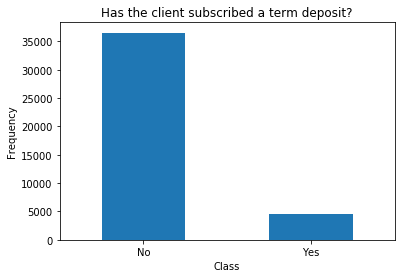

In [14]:
# Bar chart for target variable, we can see it is highly imbalanced
%matplotlib inline
import matplotlib.pyplot as plt
count_classes = pd.value_counts(new_df['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Has the client subscribed a term deposit?")
plt.xticks(range(2), ["No","Yes"])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [15]:
# Scaling data using standardscaler
from sklearn.preprocessing import StandardScaler

features = list(new_df.columns)
features
target = features.pop()
target

x = new_df.loc[:, features].values
y = new_df.loc[:, target].values

scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, shuffle = True, train_size = 0.8, random_state = 100)

In [18]:
# Creating Logistic Regressor and predicting without any feature elimination or oversampling
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [19]:
# Creating confusion matrix
matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

In [20]:
# Logic to create confusion matrix figure
LABELS = ["No","Yes"]
import seaborn as sns
def draw_matrix(conf_matrix, LABELS):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS,
                yticklabels=LABELS, annot=True, fmt="f");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

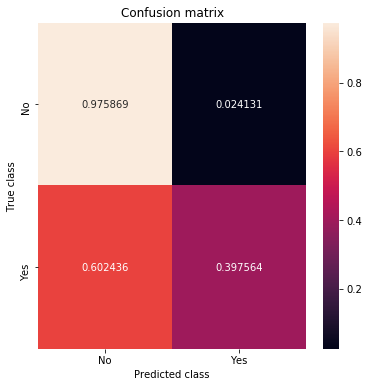

In [21]:
draw_matrix(matrix, LABELS)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7335
           1       0.67      0.40      0.50       903

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



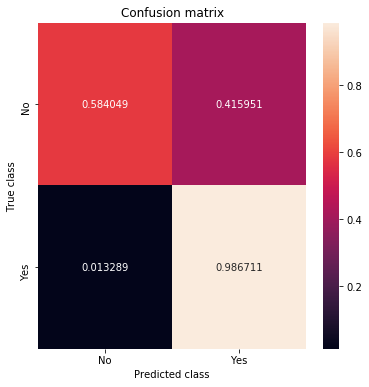

In [23]:
# Trying to fix class imbalance by adjusting class weights
clf = LogisticRegression(class_weight = {0:1, 1:100})
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [24]:
# let us try undersampling the negative class (i.e., no)
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler() 
X_resampled, y_resampled = rus.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [25]:
X_resampled.shape, y_resampled.shape

((7474, 20), (7474,))

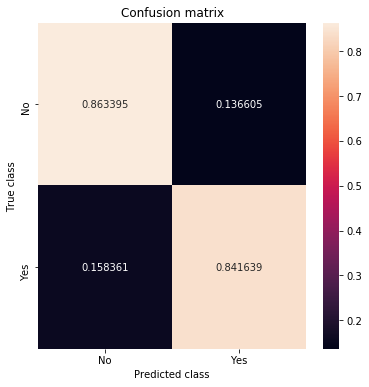

In [26]:
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [27]:
#let us try oversampling the class using ADASYN (i.e., yes)
from imblearn.over_sampling import ADASYN 
ada = ADASYN() 
X_resampled, y_resampled = ada.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [28]:
X_resampled.shape, y_resampled.shape

((58028, 20), (58028,))

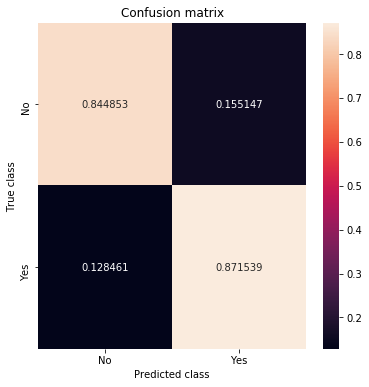

In [29]:
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

In [74]:
#Let us use a combination of Smote and Edited Nearest Neighbor to oversample
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
X_resampled, y_resampled = smo.fit_sample(x_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

LogisticRegression()

In [75]:
X_resampled.shape, y_resampled.shape

((52990, 20), (52990,))

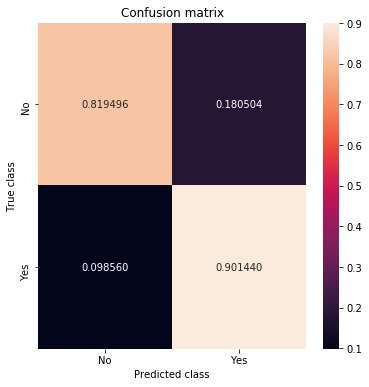

In [76]:
# Confusion matrix using oversampling by SMOTE, this True positive value is best 
y_pred = clf.predict(x_test)
draw_matrix(confusion_matrix(y_test, y_pred, normalize = 'true'), LABELS)

Feature: 0, Score: 0.08788
Feature: 1, Score: 0.04551
Feature: 2, Score: 0.07700
Feature: 3, Score: 0.12974
Feature: 4, Score: -0.17688
Feature: 5, Score: -0.00669
Feature: 6, Score: 0.00992
Feature: 7, Score: -0.44891
Feature: 8, Score: -0.12165
Feature: 9, Score: 0.02159
Feature: 10, Score: 1.18051
Feature: 11, Score: -0.10294
Feature: 12, Score: -0.18315
Feature: 13, Score: -0.01889
Feature: 14, Score: 0.16899
Feature: 15, Score: -1.49582
Feature: 16, Score: 0.61261
Feature: 17, Score: 0.21869
Feature: 18, Score: 0.57522
Feature: 19, Score: -0.43204


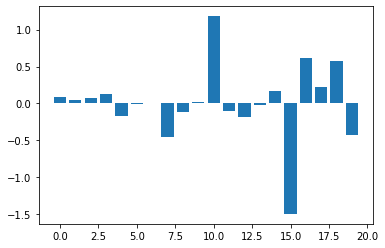

In [41]:
# To visualize which feature has more importance with target variable
from matplotlib import pyplot

clf = LogisticRegression()
clf.fit(x_train, y_train)

# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
# RFECV with cross validation to remove features
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV

estimator = GradientBoostingClassifier(random_state=42)
rfecv = RFECV(estimator, step=1, cv=5, min_features_to_select=10)
selector = rfecv.fit(x_scaled, y)
mask= selector.support_
#selector = selector.fit(x, y)

print(mask)
selector.n_features_


[ True False False False False False False  True  True  True  True False
  True False  True False  True  True  True  True]


11

([], <a list of 0 Text yticklabel objects>)

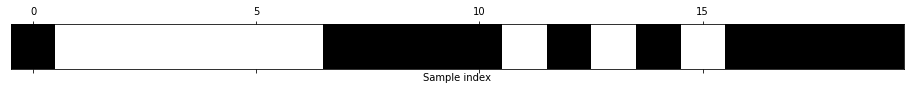

In [31]:
# Gray Scale plot to indicate the selected features
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [32]:
# Creating a new dataframe with selected features
indicesList = list(np.where(mask)[0])
indicesList

reduced_df = new_df.iloc[:, indicesList]
reduced_df

age  contact  month  day_of_week  duration  pdays  poutcome  \
0       56        1      4            0       261    999         1   
1       57        1      4            0       149    999         1   
2       37        1      4            0       226    999         1   
3       40        1      4            0       151    999         1   
4       56        1      4            0       307    999         1   
...    ...      ...    ...          ...       ...    ...       ...   
41183   73        0     10            4       334    999         1   
41184   46        0     10            4       383    999         1   
41185   56        0     10            4       189    999         1   
41186   44        0     10            4       442    999         1   
41187   74        0     10            4       239    999         0   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              93.994          -36.4      4.857       5191.0  
1              93.994          -36.4      4.857       5191.0  
2              93.994          -36.4      4.857       5191.0  
3              93.994          -36.4      4.857       5191.0  
4              93.994          -36.4      4.857       5191.0  
...               ...            ...        ...          ...  
41183          94.767          -50.8      1.028       4963.6  
41184          94.767          -50.8      1.028       4963.6  
41185          94.767          -50.8      1.028       4963.6  
41186          94.767          -50.8      1.028       4963.6  
41187          94.767          -50.8      1.028       4963.6  

[41188 rows x 11 columns]

In [33]:
#creating x1 and y1 variables for models from reduced_df and scaling data

selected_features = list(reduced_df.columns)
#selected_features

reduced_df['y'] = new_df['y'].values

x1 = reduced_df.loc[:, selected_features].values
y1 = reduced_df.loc[:, target].values

scaled_x1= scaler.fit_transform(x1)

X_train, X_test, Y_train, Y_test = train_test_split(scaled_x1, y1, test_size = 0.2,random_state=42)

# Using evaluation metrics for classification 
scoring = ['accuracy', 'precision', 'recall', 'f1']

C:\Users\rikky\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#Let us use a combination of Smote and Edited Nearest Neighbor on reduced dataset,
# as this has the best TP value from above confusion matrix.
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
X_resampled, y_resampled = smo.fit_sample(X_train, Y_train) 
clfLR = LogisticRegression() 
clfLR.fit(X_resampled, y_resampled)

LogisticRegression()

In [35]:
X_resampled.shape, y_resampled.shape

((50106, 11), (50106,))

Training score:  0.9204686065541053
Testing score:  0.8272638990046127


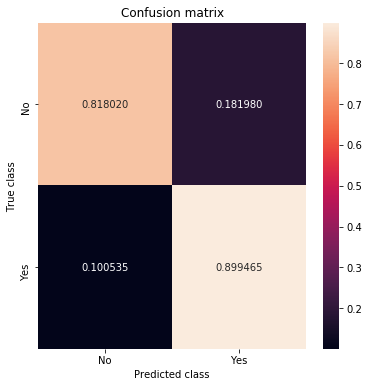

10Fold Cross Validation Results Logistic Regression classification:
Accuracy :  0.9203487019176574
Precision :  0.925901764736072
Recall :  0.9176591403936
F1 Score :  0.9217493352608667


In [36]:
# Logistic Regression with selected feature
y_pred = clfLR.predict(X_test)
print("Training score: ", clfLR.score(X_resampled, y_resampled))
print("Testing score: ", clfLR.score(X_test, Y_test))
draw_matrix(confusion_matrix(Y_test, y_pred, normalize = 'true'), LABELS)

scores = cross_validate(clfLR, X_resampled, y_resampled, cv=10, 
 scoring=scoring)

print("10Fold Cross Validation Results Logistic Regression classification:")
print("Accuracy : ",np.mean(scores['test_accuracy']))
print("Precision : ",np.mean(scores['test_precision']))
print("Recall : ",np.mean(scores['test_recall']))
print("F1 Score : ",np.mean(scores['test_f1']))

In [46]:
# Classification report for Logistic Regressor
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      7335
           1       0.11      0.27      0.16       903

    accuracy                           0.69      8238
   macro avg       0.50      0.50      0.48      8238
weighted avg       0.81      0.69      0.74      8238



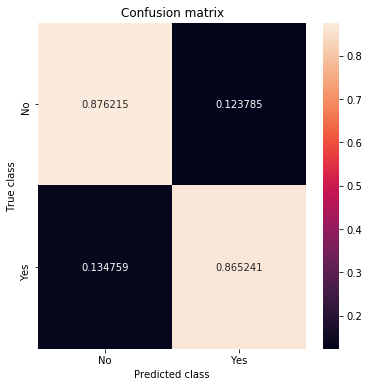

Training score:  1.0
Testing score:  0.8749696528283564
10Fold Cross Validation Results Random Forest classification:
Accuracy :  0.9884845037524232
Precision :  0.9838873958452832
Recall :  0.9937528519578948
F1 Score :  0.988785376096305


In [38]:
# Random Forest Classifier with selected feature
from sklearn.ensemble import RandomForestClassifier 

rfClf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfClf.fit(X_resampled, y_resampled) 
y_predRF=rfClf.predict(X_test)
draw_matrix(confusion_matrix(Y_test, y_predRF, normalize = 'true'), LABELS)

print("Training score: ", rfClf.score(X_resampled, y_resampled))
print("Testing score: ", rfClf.score(X_test, Y_test))

scores = cross_validate(rfClf, X_resampled, y_resampled, cv=10, 
 scoring=scoring)

print("10Fold Cross Validation Results Random Forest classification:")
print("Accuracy : ",np.mean(scores['test_accuracy']))
print("Precision : ",np.mean(scores['test_precision']))
print("Recall : ",np.mean(scores['test_recall']))
print("F1 Score : ",np.mean(scores['test_f1']))

In [43]:
# Classification report for Random Forest Classifier
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7335
           1       0.11      0.21      0.15       903

    accuracy                           0.73      8238
   macro avg       0.50      0.50      0.49      8238
weighted avg       0.81      0.73      0.76      8238



Training score:  1.0
Testing score:  0.8724204904102938


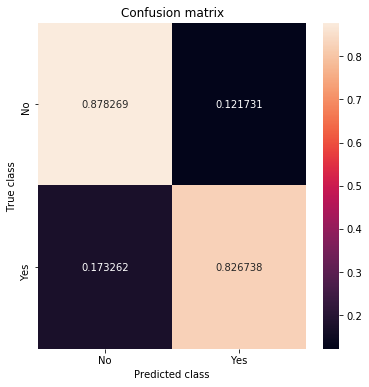

10Fold Cross Validation Results Decision Tree classification:
Accuracy :  0.9796234153126594
Precision :  0.9787726159433602
Recall :  0.9814538683141496
F1 Score :  0.9800577596029004


In [39]:
# Decision Tree Classifier with selected feature
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_resampled, y_resampled)

print("Training score: ", dt.score(X_resampled, y_resampled))
print("Testing score: ", dt.score(X_test, Y_test))

y_predDT = dt.predict(X_test)

draw_matrix(confusion_matrix(Y_test, y_predDT, normalize = 'true'), LABELS)

scores = cross_validate(dt, X_resampled, y_resampled, cv=10, 
 scoring=scoring)

print("10Fold Cross Validation Results Decision Tree classification:")
print("Accuracy : ",np.mean(scores['test_accuracy']))
print("Precision : ",np.mean(scores['test_precision']))
print("Recall : ",np.mean(scores['test_recall']))
print("F1 Score : ",np.mean(scores['test_f1']))

In [44]:
# Classification report for Decision Tree Classifier
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7335
           1       0.12      0.22      0.15       903

    accuracy                           0.74      8238
   macro avg       0.50      0.51      0.50      8238
weighted avg       0.81      0.74      0.77      8238



Training score:  1.0
Testing score:  0.8724204904102938


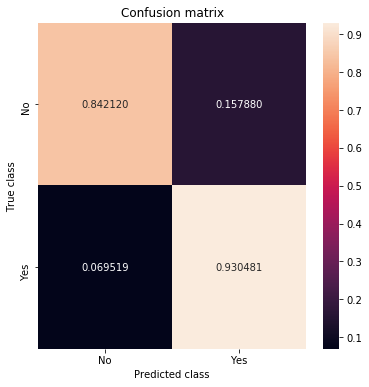

10Fold Cross Validation Results XGBoost classification:
Accuracy :  0.9645551881668712
Precision :  0.9570459082013635
Recall :  0.9744267812296439
F1 Score :  0.965643317206929


In [42]:
# XGBoost Classifier with selected feature
import xgboost
from xgboost import XGBClassifier

xgClf = XGBClassifier()
xgClf.fit(X_resampled, y_resampled)

print("Training score: ", dt.score(X_resampled, y_resampled))
print("Testing score: ", dt.score(X_test, Y_test))

y_predXG = xgClf.predict(X_test)

draw_matrix(confusion_matrix(Y_test, y_predXG, normalize = 'true'), LABELS)

scores = cross_validate(xgClf, X_resampled, y_resampled, cv=10, 
 scoring=scoring)

print("10Fold Cross Validation Results XGBoost classification:")
print("Accuracy : ",np.mean(scores['test_accuracy']))
print("Precision : ",np.mean(scores['test_precision']))
print("Recall : ",np.mean(scores['test_recall']))
print("F1 Score : ",np.mean(scores['test_f1']))

In [45]:
# Classification report for XG Boost Classifier
print(classification_report(y_test, y_predXG))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      7335
           1       0.11      0.25      0.16       903

    accuracy                           0.70      8238
   macro avg       0.50      0.50      0.49      8238
weighted avg       0.81      0.70      0.74      8238



                                            # Model Comparison

|     Model     |     Confusion Matrix    | Precision | Recall | Accuracy | F1-score |
|  :-:  |  :-:  |  :-:  |  :-:  |  :-:  |  :-:  |
| RandomForestClassifier | TP:0.86 TN:0.87 FP:0.12 FN:0.13 | 0.983 | 0.993 | 0.988 | 0.988 |
| DecisionTreeClassifier | TP:0.82 TN:0.87 FP:0.12 FN:0.17  | 0.978 | 0.981 | 0.979 | 0.980 |
| XGBoostClassifier | TP:0.93 TN:0.84 FP:0.15 FN:0.06  | 0.957 | 0.974 | 0.964 | 0.964 |
| LogisticRegression | TP:0.89 TN:0.81 FP:0.18 FN:0.10 | 0.925 | 0.917 | 0.920 | 0.921 |

In [ ]:
# From the above comparison we can conclude the below 
# Order in which the model performs better
1. Random Forest Classifier
2. Decision Tree Classifier
3. XGBoost Classifier
4. Logistic Regression